# Task 6: K-Nearest Neighbors (KNN) Classification

Objective: Understand and implement KNN for classification problems.

Tools: Scikit-learn, Pandas, Matplotlib

importing the dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [43]:
#Getting the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


In [44]:
#reading the data
df = pd.read_csv(path + '/Iris.csv')

In [45]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
#dropping the 'Id' column
df.drop('Id',axis=1,inplace=True)

In [48]:
#Counting the species categories
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


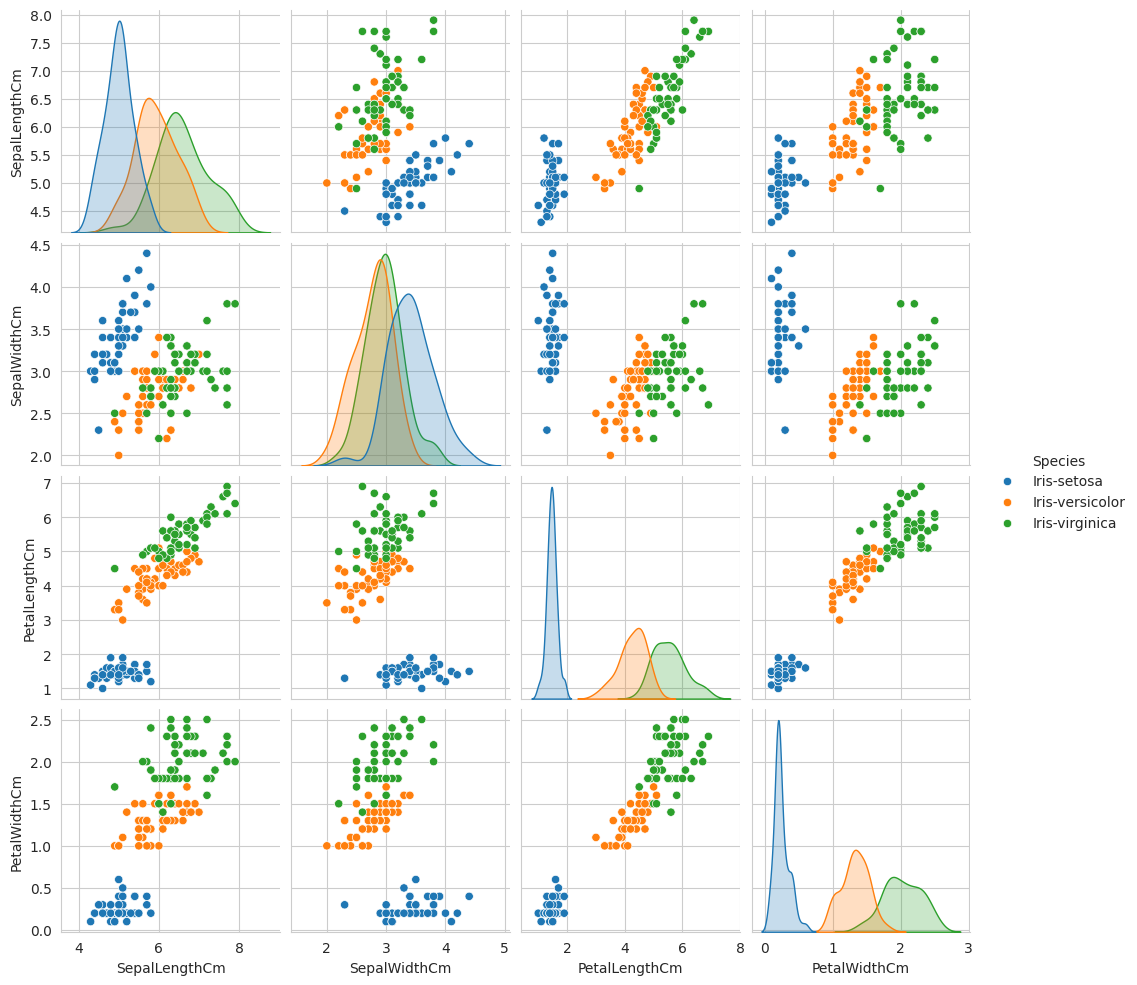

In [49]:
#Checking the relationship
sns.pairplot(df,hue='Species')

**Observations:**
Iris-setosa is clearly separable from the other species, especially by petal dimensions. Petal length and width show strong positive correlation and are the most useful features for classification. Versicolor and virginica overlap slightly, especially in sepal measurements.


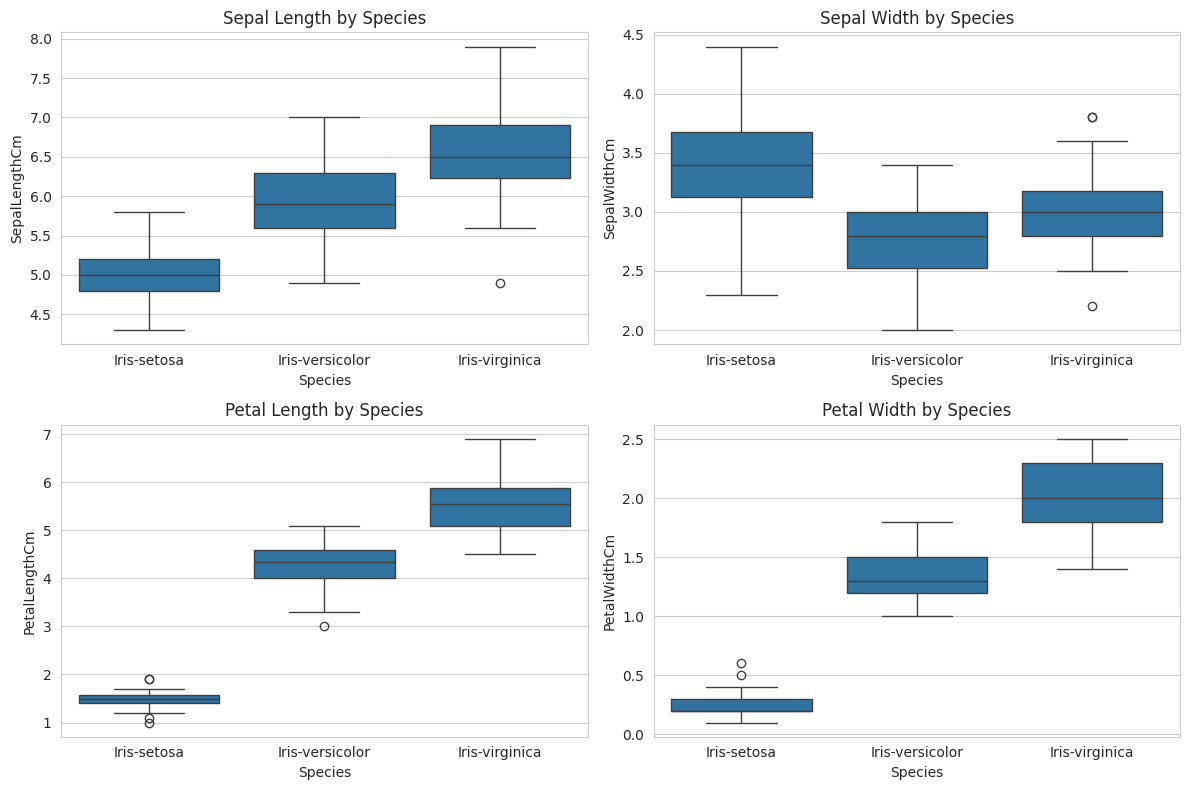

In [50]:
#Boxplot to checkt the spread
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

**Observations from Boxplots**

**1. Sepal Length by Species**
- Iris-setosa has the smallest sepal lengths, mostly between 4.8–5.2 cm.
- Iris-versicolor shows a higher median (~5.9 cm) with a wider range.
- Iris-virginica has the longest sepal lengths, with a median above 6.5 cm and values reaching up to 8 cm.

**2. Sepal Width by Species**
- Iris-setosa has the widest sepal width, centered around 3.5 cm.
- Iris-versicolor has a lower median and narrower spread.
- Iris-virginica shows a slightly broader spread but similar median to versicolor.

**3. Petal Length by Species**
- Iris-setosa has very short petals, tightly packed between 1.3–1.6 cm.
- Iris-versicolor petals range from about 3 to 5 cm.
- Iris-virginica has the longest petals, reaching nearly 7 cm.

**4. Petal Width by Species**
- Iris-setosa has narrow petals, usually under 0.4 cm.
- Iris-versicolor shows moderate widths, around 1.2–1.5 cm.
- Iris-virginica peta


In [51]:
#Splitting the data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
#Encoding the data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y.values.reshape(-1,1)).toarray()

In [53]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
#Model Training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [72]:
#Evaluating the metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



In [60]:
print(f"Accuracy Score is {accuracy_score(y_test,pred):.2%}")

Accuracy Score is 100.00%
